Pandas is most commonly used for data wrangling and data manipulation purpose.

Numpy is a fundamental library for numerical computing in python. Mathematical Operation, Arrays, Linear Algebra etc...

Points are used in this project.
1. Removing Duplicates
2. Fixing NULL Values
3. Standardizing categorical values
4. Renaming Columns
5. Handling Outliers
6. Create a Bar Chart ("National Sales by Region and Country")
7. Create Box Plot("Global Sales By Platform")
8. Create Line Chart 

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


In [74]:
df = pd.read_csv('C:/Users/Huawei/Downloads/VideoGamesSales.csv') #df = data frame

#Fixing null values and remove duplicates in Region column.

# df=df[df.duplicated()] # This line ued to get duplicate values
df=df.drop_duplicates() # This line is used to remove duplicate values 

df['Region'] = df['Region'].fillna('North') #If any null values its filled "North" by using "fillna".
#df=df[df['Region'].isnull()] #To check if there is any null values.
#df.shape[0]
#df.head(100) #top 100 values in DB
df.tail(100) #last 100 values in DB

,Rank,Name,Platform,Year,Month,Genre,Publisher,Country,City,State,Region,NA_Sales,Global_Sales,NA_Profit,Global_Profit
5806,5795,NBA Live 08,PSP,2017,Oct,Sports,Electronic Arts,Australia,Sydney,New South Wales,West,0.28,0.31,0.084,0.093
5807,5796,The King of Fighters XIII,PS3,2017,Nov,Fighting,Rising Star Games,Australia,Sydney,New South Wales,West,0.17,0.31,0.051,0.093
5808,5797,NCAA Final Four 2002,PS2,2017,Dec,Sports,Sony Computer Entertainment,Australia,Sydney,New South Wales,West,0.15,0.31,0.045,0.093
5809,5798,South Park: Chef's Luv Shack,PS,2017,Jan,Misc,Acclaim Entertainment,Australia,Sydney,New South Wales,West,0.17,0.31,0.051,0.093
5810,5799,Music Maker,PS2,2017,Feb,Misc,Magix,Australia,Sydney,New South Wales,West,0.15,0.31,0.045,0.093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5904,5890,Crazy Taxi: Catch a Ride,GBA,2017,Sep,Racing,THQ,Australia,Sydney,New South Wales,West,0.21,0.30,0.063,0.090
5905,5891,MySims Party,DS,2017,Oct,Simulation,Electronic Arts,Australia,Sydney,New South Wales,West,0.15,0.30,0.045,0.090
5906,5892,Harry Potter and the Order of the Phoenix,X360,2017,Nov,Action,Electronic Arts,Australia,Sydney,New South Wales,West,0.24,0.30,0.072,0.090
5907,5893,Skylanders: SuperChargers,PS4,2017,Dec,Action,Activision,Australia,Sydney,New South Wales,West,0.17,0.30,0.051,0.090


In [75]:
#Fixing Null values and remove $ dollar sign in NA_sales cloumn
df['NA_Sales'] = df['NA_Sales'].replace('[$]','',regex=True) ##This line is used to remove $ dollor sign.
#df

#Get Average values in NA_Sales column becaues i want to replace the null with the average value of this column. Before that i am going to convert this column to numeric values.
df['NA_Sales'] = pd.to_numeric(df['NA_Sales'], errors='coerce') #This line is used to Convert NA_Sales column to numeric.
Average_Sales = df['NA_Sales'].mean() #Get Average Vales from NA_Sales Cloumn.
Average_Sales = int(Average_Sales) 
#Average_Sales 
df['NA_Sales']=df['NA_Sales'].fillna('Average_Sales') # This line is going to replace null vales in NA_Sales to fill Average values above we found.(Average_Sales value is "0")
#df


# Standardizing categorical values

#Next We need to Clean Country Column. Example = Some values are United States, some values are USA, some values or united sales(First letter is smallletter). i have to make this column in proper standard.
df['Country'] = df['Country'].replace({'USA':'United States'}) #This line is used to replace "USA to United States".
#df
df['Country'] = df['Country'].str.title() #This line is used to Chnage the first letter to Capital letter Ex: "united states" to "United States" 
#df = df[df['Country']=='United States'] #This is used to change all the different country name to same country name.
#df
#df.shape[0]


# Renaming Column Names

df=df.rename(columns={'NA_Sales':'National Sales','Global_Sales':'Global Sales','NA_Profit':'National Profit','Global_Profit':'Global Profit'}) #This is used to the change the column name 
df.head(2) #This returns top two rows


,Rank,Name,Platform,Year,Month,Genre,Publisher,Country,City,State,Region,National Sales,Global Sales,National Profit,Global Profit
0,1,Wii Sports,Wii,2010,Jan,Sports,Nintendo,United States,Fairfield,California,West,41.49,82.74,12.447,24.822
1,2,Super Mario Bros.,NES,2010,Feb,Platform,Nintendo,United States,Edmonds,Washington,West,29.08,40.24,8.724,12.072


In [76]:
#handling Outliers
sales_cap = df['National Sales'].quantile(0.95) # This line is used to get 95% values which are lessthan that result
#sales_cap
df['National Sales'] = np.where(df['National Sales'] > sales_cap, sales_cap, df['National Sales']) #This line Shows us the contition where we given. "np.where(df['National Sales'] > sales_cap This one is contion to get higher values". Then this line is used to change which of the values are higher that the above result, then it will replace all the higher values as same as the above result. The above result is 2.07. 
df

,Rank,Name,Platform,Year,Month,Genre,Publisher,Country,City,State,Region,National Sales,Global Sales,National Profit,Global Profit
0,1,Wii Sports,Wii,2010,Jan,Sports,Nintendo,United States,Fairfield,California,West,2.07,82.74,12.447,24.822
1,2,Super Mario Bros.,NES,2010,Feb,Platform,Nintendo,United States,Edmonds,Washington,West,2.07,40.24,8.724,12.072
2,3,Mario Kart Wii,Wii,2010,Mar,Racing,Nintendo,United States,Louisville,Kentucky,South,2.07,35.82,4.755,10.746
3,4,Wii Sports Resort,Wii,2010,Apr,Sports,Nintendo,United States,Round Rock,Texas,Central,2.07,33.00,4.725,9.900
4,5,Pokemon Red/Pokemon Blue,GB,2010,May,Role-Playing,Nintendo,United States,Nashville,Tennessee,South,2.07,31.37,3.381,9.411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5904,5890,Crazy Taxi: Catch a Ride,GBA,2017,Sep,Racing,THQ,Australia,Sydney,New South Wales,West,0.21,0.30,0.063,0.090
5905,5891,MySims Party,DS,2017,Oct,Simulation,Electronic Arts,Australia,Sydney,New South Wales,West,0.15,0.30,0.045,0.090
5906,5892,Harry Potter and the Order of the Phoenix,X360,2017,Nov,Action,Electronic Arts,Australia,Sydney,New South Wales,West,0.24,0.30,0.072,0.090
5907,5893,Skylanders: SuperChargers,PS4,2017,Dec,Action,Activision,Australia,Sydney,New South Wales,West,0.17,0.30,0.051,0.090


In [77]:
#Create a Bar Chart. Display Region in country wise National Sales 

National_Sales = df.groupby(['Region','Country'])['National Sales'].sum().reset_index().sort_values(by = 'National Sales', ascending=False) #This line is to get total values by using Region and Country Columns. reset_index() it is used to return table format.
# "sort_values(by = 'National Sales', ascending=False)" It is used to show as a decending order. If we not mentioned ascending=False it will return as acending order.
National_Sales

,Region,Country,National Sales
9,West,United States,796.65
8,West,Australia,683.62
2,East,United States,668.92
0,Central,United States,558.67
7,South,United States,405.99
5,Other,Australia,28.21
4,North,United States,17.69
6,South,Australia,16.30
3,North,Australia,15.24
1,East,Australia,1.35


<function matplotlib.pyplot.show(close=None, block=None)>

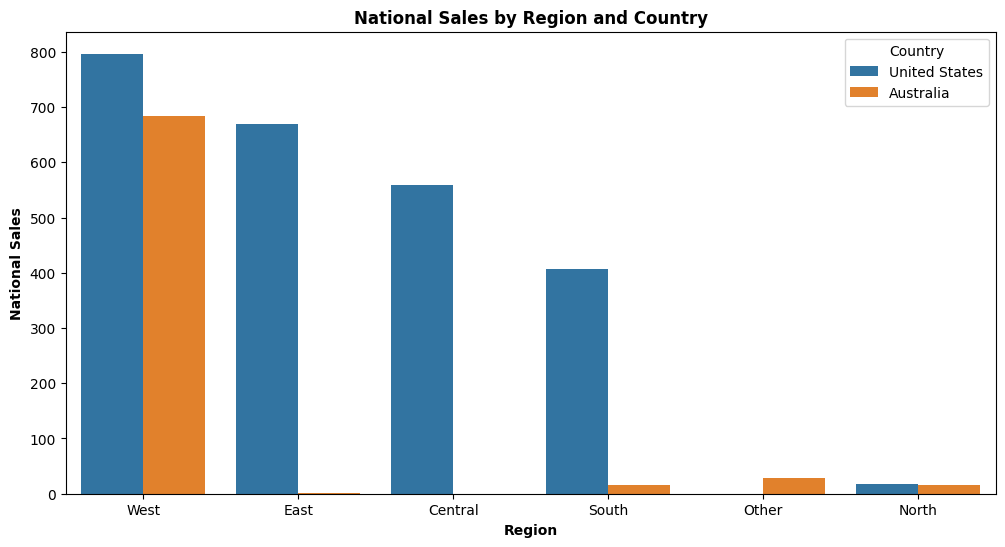

In [78]:
#Create a Bar Chart
plt.figure(figsize=(12,6)) #Size of the Bar Chart
sns.barplot(data=National_Sales, x='Region', y='National Sales', hue='Country') #hue is used to return diff color for country.
plt.title('National Sales by Region and Country', fontweight='bold')
plt.xlabel('Region',fontweight='bold')
plt.ylabel('National Sales',fontweight='bold')
plt.show

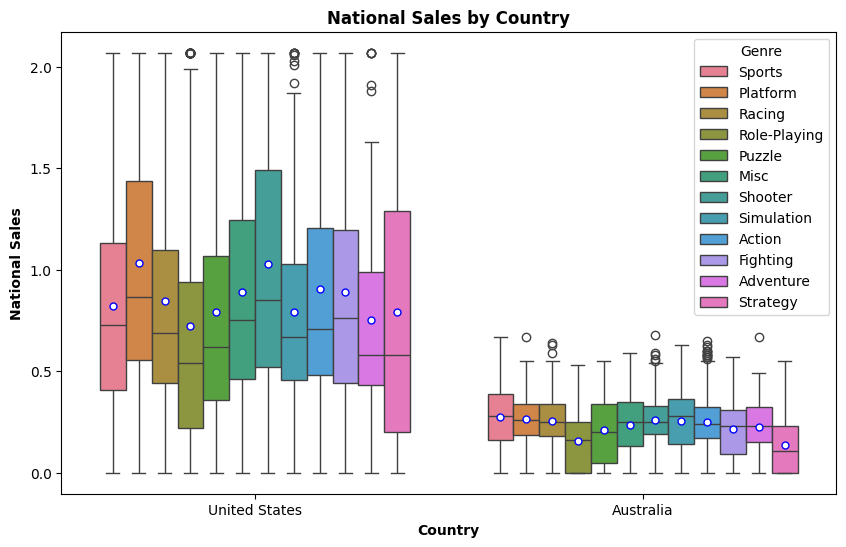

In [79]:
#Create Box Plot

plt.figure(figsize=(10,6))
sns.boxplot(x='Country', y='National Sales', data=df, showmeans=True, hue='Genre', meanprops={'marker':'o','markerfacecolor':"White",'markersize':"5",'markeredgecolor':'Blue'})

plt.title('National Sales by Country', fontweight='bold')
plt.xlabel('Country', fontweight='bold')
plt.ylabel('National Sales', fontweight='bold')
plt.show()


In [80]:
#Create a Pie Chart

sales = df.groupby(['Country'])[['National Sales','Global Sales']].sum().reset_index()
sales

,Country,National Sales,Global Sales
0,Australia,744.72,1468.25
1,United States,2447.92,6315.68


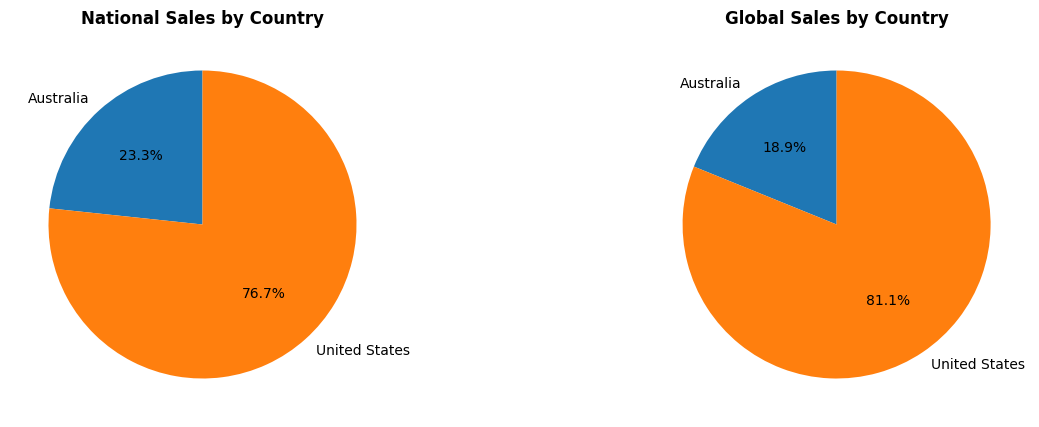

In [84]:
#Create a Pie Chart using National Sales and Global Sales

Country = sales['Country']
National_Sales=sales['National Sales']
Global_Sales=sales['Global Sales']

fig, axs = plt.subplots(1,2, figsize=(15,5)) # This line is used to create a outline  for the pie chart and also return 2 chart in one page

axs[0].pie(National_Sales, labels=Country, autopct='%1.1f%%', startangle=90)
axs[0].set_title('National Sales by Country', fontweight='bold')

axs[1].pie(Global_Sales, labels=Country, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Global Sales by Country', fontweight='bold')
plt.show()

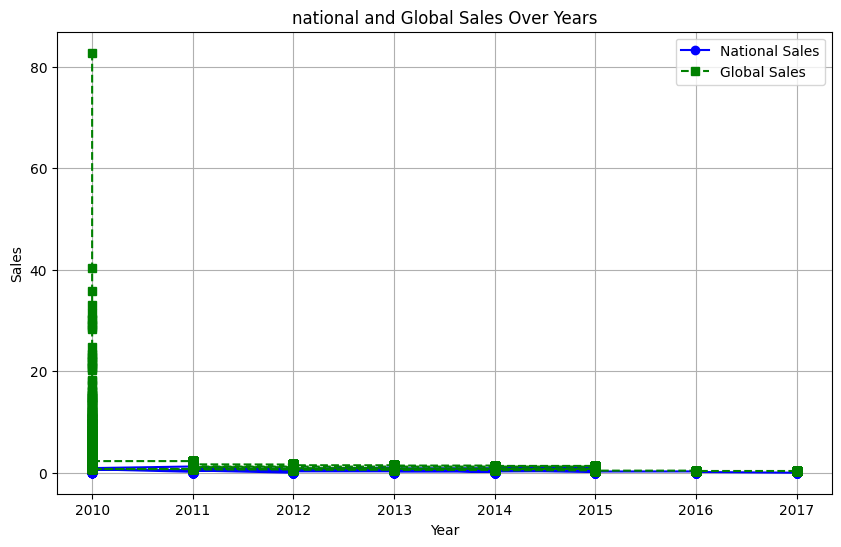

In [87]:
#Create Line chart
#National sales and global sales over years.

plt.figure(figsize=(10,6))

#Line chart for National Sales
plt.plot(df['Year'], df['National Sales'], marker='o', linestyle='-', color='b', label='National Sales')

#line Chart for Global Sales
plt.plot(df['Year'], df['Global Sales'], marker='s', linestyle='--', color='g', label='Global Sales')

#Adding Title and labels
plt.title('national and Global Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()

#Display the line chart
plt.grid(True)
plt.show()